In [24]:
import sys, os
import pandas as pd
import pickle as pkl
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from functools import reduce
from matplotlib.ticker import MaxNLocator
from scipy.stats import ks_2samp

from statannotations.Annotator import Annotator
from statannotations.stats.StatTest import StatTest

In [25]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [26]:
PERFORMANCE_DATA_DIR = os.path.expanduser("../../data/processed/Performance/")
NAME_FOR_MODEL = "X-CRISP-"
COMMON_ORDER_OF_MODELS = [NAME_FOR_MODEL + "KLD", NAME_FOR_MODEL + "MSE", "FORECasT", "Lindel", "inDelphi", "CROTON"]
sns.set_context("paper")

In [27]:
COMMON_ORDER_OF_MODELS

['X-CRISP-KLD', 'X-CRISP-MSE', 'FORECasT', 'Lindel', 'inDelphi', 'CROTON']

In [28]:
def plot_boxplots(df, y, x = "Method", col="Dataset", func="max", padding=1.45, includeSwarm=True):
    methods = df["Method"].unique()
    print(methods)
    order = [o for o in COMMON_ORDER_OF_MODELS if o in methods]

    g = sns.catplot(data=df, y=y, x="Method", col=col, order=order, kind="box", palette="colorblind", height=4.8, aspect=1.1)
    ax1, ax2 = g.axes[0]
    # if includeSwarm:
    #     sns.swarmplot(data=df[df.Dataset == "FORECasT mESC"], y=y, x="Method", order=order, color=".15", ax=ax1, size=.5)
    #     sns.swarmplot(data=df[df.Dataset == "inDelphi mESC"], y=y, x="Method", order=order, color=".15", ax=ax2, size=.5)
    print([col, "Method"])
    maxes = getattr(df.drop("Target Site", axis=1).groupby([col, "Method"]).median().groupby([col]), func)()

    
    ax1.axhline(maxes.loc["FORECasT mESC", y], ls="--")
    ax2.axhline(maxes.loc["inDelphi mESC", y], ls="--")

    pairs = [(NAME_FOR_MODEL + "KLD", m) for m in order[1:]]
    alternative = "greater" if func == "max" else "less"

    custom_long_name = "Two-sample Kolmogorov-Smirnov test"
    custom_short_name = ""
    custom_func = ks_2samp
    custom_test = StatTest(custom_func, custom_long_name, custom_short_name)

    annotator = Annotator(ax1, pairs, data=df[df[col] == "FORECasT mESC"], x=x, y=y, order=order)
    annotator.configure(test="Wilcoxon", text_format='star', loc='outside')
    annotator.apply_test(alternative="two-sided")
    annotator.annotate()
    ax1.set_title("Dataset = FORECasT mESC", fontsize = 10, y=padding)
    ax1.set_xlabel("")

    annotator = Annotator(ax2, pairs, data=df[df[col] == "inDelphi mESC"], x=x, y=y, order=order)
    annotator.configure(test="Wilcoxon", text_format='star', loc='outside')
    annotator.apply_test(alternative="two-sided")
    annotator.annotate()
    ax2.set_title("Dataset = inDelphi mESC", fontsize = 10, y=padding)
    ax2.set_ylabel("")
    ax2.set_xlabel("")

    plt.tight_layout()

    return g

In [29]:
def name_correction(df):
    df.loc[df["Method"] == "KLD", "Method"] = NAME_FOR_MODEL + "KLD"
    df.loc[df["Method"] == "1NN", "Method"] = NAME_FOR_MODEL + "MSE"
    df.loc[df["Dataset"] == "FORECasT WT", "Dataset"] = "FORECasT mESC"
    df.loc[df["Dataset"] == "inDelphi WT", "Dataset"] = "inDelphi mESC"
    return df

def data_correction(df, rename):
    df = df.rename(columns={"0": rename})
    df.loc[df["Method"] == "KLD", "Method"] = NAME_FOR_MODEL + "KLD"
    df.loc[df["Method"] == "1NN", "Method"] = NAME_FOR_MODEL + "MSE"
    df = df.loc[~(df["Method"] == "1NN")]
    df.loc[df["Dataset"] == "FORECasT WT", "Dataset"] = "FORECasT mESC"
    df.loc[df["Dataset"] == "inDelphi WT", "Dataset"] = "inDelphi mESC"
    return df

In [30]:
overall_df = name_correction(pd.read_csv(PERFORMANCE_DATA_DIR + "overall.tsv", sep="\t"))
# plot_boxplots(overall_df, y="KL Divergence", func="min")
# plt.savefig("./images/performance_kl_div.pdf", facecolor="white", bbox_inches='tight')

plot_boxplots(overall_df, y="Pearson's Correlation", func="max")
plot_boxplots(overall_df, y="Jensen Shannon", func="min")

['X-CRISP-MSE' 'X-CRISP-KLD' 'inDelphi' 'Lindel' 'FORECasT']
['Dataset', 'Method']
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

X-CRISP-KLD vs. X-CRISP-MSE: Wilcoxon test (paired samples), P_val:3.649e-01 Stat=3.434e+06
X-CRISP-KLD vs. FORECasT: Wilcoxon test (paired samples), P_val:9.933e-01 Stat=3.494e+06
X-CRISP-KLD vs. Lindel: Wilcoxon test (paired samples), P_val:1.551e-192 Stat=1.541e+06
X-CRISP-KLD vs. inDelphi: Wilcoxon test (paired samples), P_val:0.000e+00 Stat=5.526e+05
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

X-CRISP-KLD vs. X-CRISP-MSE: Wilcoxon test (paired samples), P_val:2.492e-08 Stat=8.186e+05
X-CRISP-KLD vs. FORECasT: Wilcoxon test (paired samples), P_val:8.850e-01 Stat=9.543e+05
X-CRISP-KLD vs. 

In [31]:
overall_df.head()

,Dataset,Method,Target Site,Pearson's Correlation,KL Divergence,Jensen Shannon
0,FORECasT mESC,X-CRISP-MSE,Oligo_10007,0.449921,1.841293,0.611298
1,FORECasT mESC,X-CRISP-MSE,Oligo_10019,0.832138,1.232996,0.530629
2,FORECasT mESC,X-CRISP-MSE,Oligo_10026,0.843941,1.208243,0.531895
3,FORECasT mESC,X-CRISP-MSE,Oligo_10060,0.296024,1.753333,0.625429
4,FORECasT mESC,X-CRISP-MSE,Oligo_1007,0.911989,0.994647,0.471843


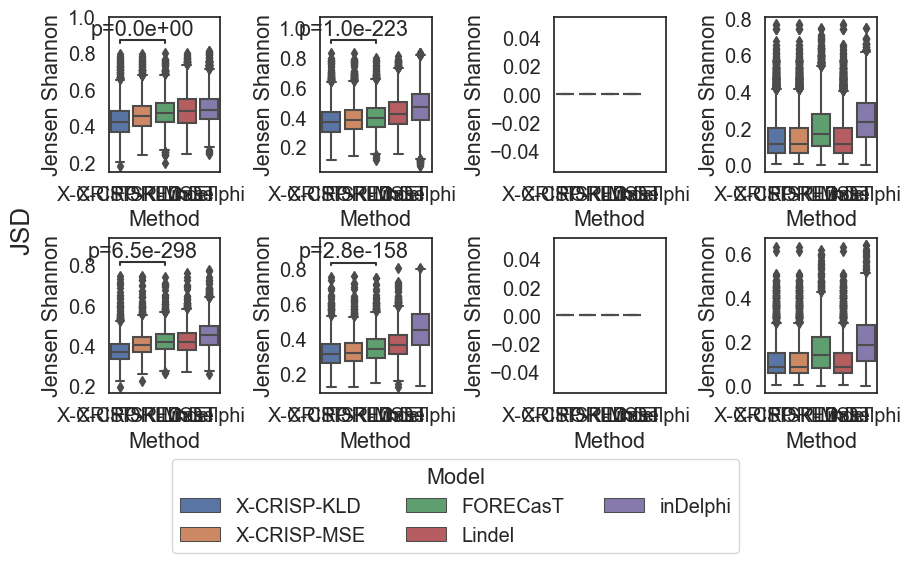

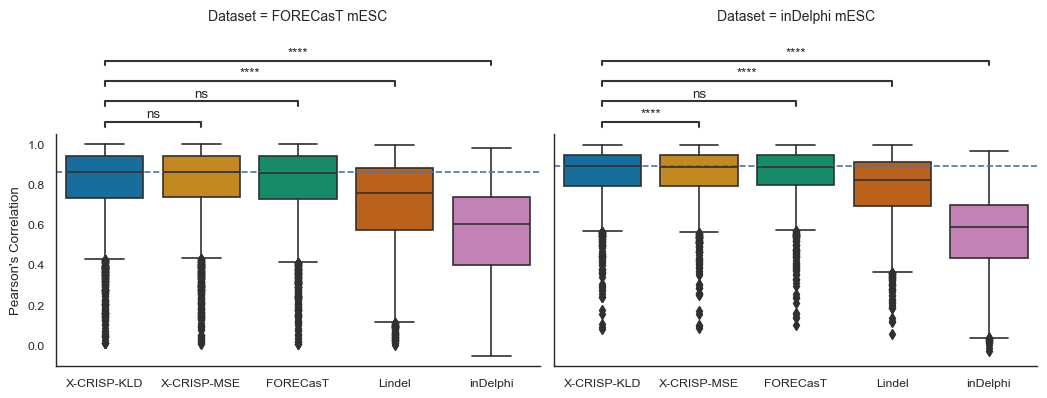

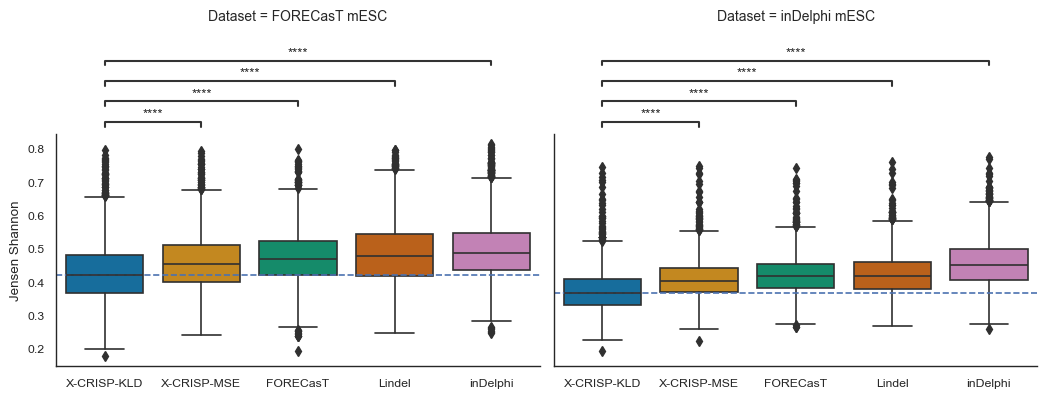

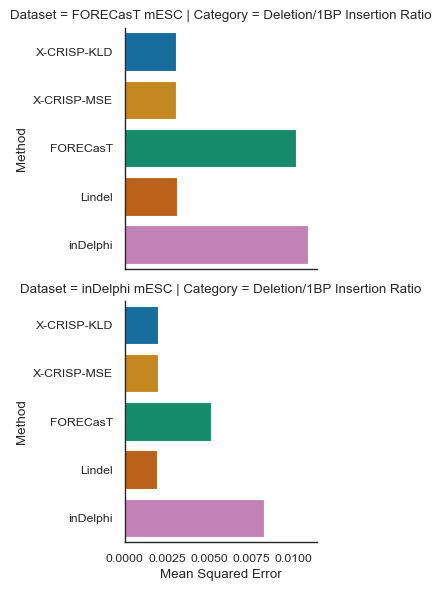

In [32]:
insdelratio_df = name_correction(pd.read_csv(PERFORMANCE_DATA_DIR + "insertion-to-deletion.tsv", sep="\t")).loc[:, ["Dataset", "Method", "Deletion/1BP Insertion Ratio"]].rename(columns={"Deletion/1BP Insertion Ratio": "Mean Squared Error"})
insdelratio_df["Category"] = "Deletion/1BP Insertion Ratio"


g2 = sns.catplot(data=insdelratio_df, 
    x="Mean Squared Error", 
    y="Method", 
    col="Category", 
    row="Dataset",
    order=COMMON_ORDER_OF_MODELS[:-1], 
    kind="bar", 
    palette="colorblind", 
    sharey="row",
    height=3, 
    aspect=1.1)

plt.show()

In [33]:
insertion_df = name_correction(pd.read_csv(PERFORMANCE_DATA_DIR + "insertion.tsv", sep="\t"))
insertion_df["Category"] = "Insertions"

FORECasT mESC Overall
inDelphi mESC Overall
FORECasT mESC MH-based deletions
inDelphi mESC MH-based deletions
FORECasT mESC MH-less deletions
inDelphi mESC MH-less deletions
FORECasT mESC 1BP insertions
inDelphi mESC 1BP insertions


/var/folders/5x/n2td64g918lgvdh3qm2x3bhc0000gn/T/ipykernel_84609/907381410.py:129: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b.set_yticklabels([""] * 6)
/var/folders/5x/n2td64g918lgvdh3qm2x3bhc0000gn/T/ipykernel_84609/907381410.py:129: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b.set_yticklabels([""] * 6)
/var/folders/5x/n2td64g918lgvdh3qm2x3bhc0000gn/T/ipykernel_84609/907381410.py:129: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b.set_yticklabels([""] * 6)
/var/folders/5x/n2td64g918lgvdh3qm2x3bhc0000gn/T/ipykernel_84609/907381410.py:129: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b.set_yticklabels([""] * 6)
/var/folders/5x/n2td64g918lgvdh3qm2x

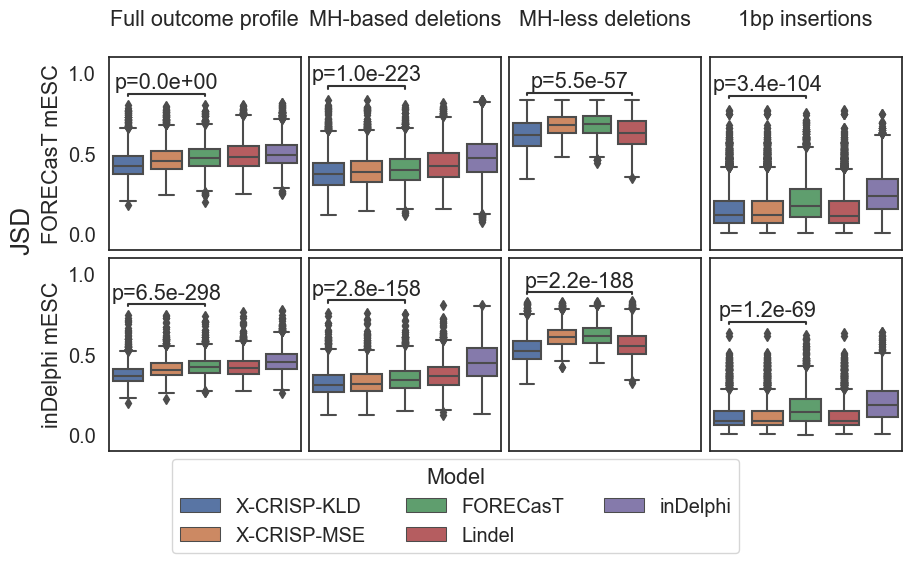

In [34]:
import scipy

metric = "Jensen Shannon"
# metric = "KL Divergence"
# metric = "Pearson's Correlation"

mhless_df = name_correction(pd.read_csv(PERFORMANCE_DATA_DIR + "mhless.tsv", sep="\t"))
mhless_df["Category"] = "MH-Less Deletions"
mh_df = name_correction(pd.read_csv(PERFORMANCE_DATA_DIR + "mh.tsv", sep="\t"))
mh_df["Category"] = "MH Deletions"
insertion_df = name_correction(pd.read_csv(PERFORMANCE_DATA_DIR + "insertion.tsv", sep="\t"))
insertion_df["Category"] = "Insertions"
remove_from_insertions = insertion_df[insertion_df.isnull().any(axis=1)]["Target Site"].unique()
insertion_df = insertion_df[~insertion_df["Target Site"].isin(remove_from_insertions)]

categories_df = pd.concat([mh_df, mhless_df, insertion_df])

sns.set(font_scale=1.3)
sns.set_style("white")

FORECasT_mESC = "FORECasT mESC"
inDelphi_mESC = "inDelphi mESC"

fig, axes = plt.subplots(2, 4, figsize=(9, 4.5), constrained_layout = True)
loc = "inside"
pad = None

if metric == "Jensen Shannon":
    fig.supylabel("JSD")
elif metric == "KL Divergence":
    fig.supylabel(metric)
    loc="outside"
    pad=20
else:
    fig.supylabel("Person's Correlation Coef.")
    loc="outside"
    pad=20


colors = sns.color_palette("deep")[:5]

sns.boxplot(data=overall_df[overall_df.Dataset == FORECasT_mESC], y=metric, x="Method", palette="deep", order=COMMON_ORDER_OF_MODELS[:-1], ax=axes[0,0])
sns.boxplot(data=overall_df[overall_df.Dataset == inDelphi_mESC], y=metric, x="Method", palette="deep", hue="Method", order=COMMON_ORDER_OF_MODELS[:-1], hue_order=COMMON_ORDER_OF_MODELS[:-1], ax=axes[1,0])
handles, labels = axes[1,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(.5, -.24), ncols=3, title="Model")
axes[1,0].clear()
sns.boxplot(data=overall_df[overall_df.Dataset == inDelphi_mESC], y=metric, x="Method", palette="deep", order=COMMON_ORDER_OF_MODELS[:-1], ax=axes[1,0])


sns.boxplot(data=mh_df[mh_df.Dataset == FORECasT_mESC], y=metric, x="Method", palette="deep", order=COMMON_ORDER_OF_MODELS[:-1], ax=axes[0,1])
sns.boxplot(data=mh_df[mh_df.Dataset == inDelphi_mESC], y=metric, x="Method", palette="deep", order=COMMON_ORDER_OF_MODELS[:-1], ax=axes[1,1])

sns.boxplot(data=mhless_df[mhless_df.Dataset == FORECasT_mESC], y=metric, x="Method", palette="deep", order=COMMON_ORDER_OF_MODELS[:-1], ax=axes[0,2])
sns.boxplot(data=mhless_df[mhless_df.Dataset == inDelphi_mESC], y=metric, x="Method", palette="deep", order=COMMON_ORDER_OF_MODELS[:-1], ax=axes[1,2])

sns.boxplot(data=insertion_df[insertion_df.Dataset == FORECasT_mESC], y=metric, x="Method", palette="deep", order=COMMON_ORDER_OF_MODELS[:-1], ax=axes[0,3])
sns.boxplot(data=insertion_df[insertion_df.Dataset == inDelphi_mESC], y=metric, x="Method", palette="deep", order=COMMON_ORDER_OF_MODELS[:-1], ax=axes[1,3])

# sns.barplot(data=insdelratio_df[insdelratio_df.Dataset == FORECasT_mESC], y="Mean Squared Error", x="Method", palette="deep", order=COMMON_ORDER_OF_MODELS[:-1], edgecolor=".05", linewidth=.75, ax=axes[0,4])
# sns.barplot(data=insdelratio_df[insdelratio_df.Dataset == inDelphi_mESC], y="Mean Squared Error", x="Method", palette="deep", order=COMMON_ORDER_OF_MODELS[:-1], edgecolor=".05", linewidth=.75, ax=axes[1,4])

def do_test(df, dataset, pairs, metric):
    pvalues = []
    df = df[df.Dataset == dataset]
    for a, b in pairs:
        a = df[df.Method == a][metric]
        b = df[df.Method == b][metric]
        pvalues.append(scipy.stats.wilcoxon(a, b, alternative="two-sided").pvalue)
    formatted_pvalues = [f'p={pvalue:.1e}' for pvalue in pvalues]
    return formatted_pvalues


print(FORECasT_mESC, "Overall")
annotator = Annotator(axes[0, 0], [(f"{NAME_FOR_MODEL}KLD", "FORECasT")], data=overall_df[overall_df.Dataset == FORECasT_mESC], y=metric, x="Method", order=COMMON_ORDER_OF_MODELS[:-1])
annotator.configure(text_format='simple', loc=loc, verbose=False)
annotator.set_custom_annotations(do_test(overall_df, FORECasT_mESC, annotator.pairs, metric))
annotator.annotate()

print(inDelphi_mESC, "Overall")
annotator = Annotator(axes[1, 0], [(f"{NAME_FOR_MODEL}KLD", "FORECasT")], data=overall_df[overall_df.Dataset == inDelphi_mESC], y=metric, x="Method", order=COMMON_ORDER_OF_MODELS[:-1])
annotator.configure(text_format='simple', loc=loc, verbose=False)
annotator.set_custom_annotations(do_test(overall_df, inDelphi_mESC, annotator.pairs, metric))
annotator.annotate()

print(FORECasT_mESC, "MH-based deletions")
annotator = Annotator(axes[0, 1], [(f"{NAME_FOR_MODEL}KLD", "FORECasT")], data=mh_df[mh_df.Dataset == FORECasT_mESC], y=metric, x="Method", order=COMMON_ORDER_OF_MODELS[:-1])
annotator.configure(text_format='simple', loc=loc, verbose=False)
annotator.set_custom_annotations(do_test(mh_df, FORECasT_mESC, annotator.pairs, metric))
annotator.annotate()

print(inDelphi_mESC, "MH-based deletions")
annotator = Annotator(axes[1, 1], [(f"{NAME_FOR_MODEL}KLD", "FORECasT")], data=mh_df[mh_df.Dataset == inDelphi_mESC], y=metric, x="Method", order=COMMON_ORDER_OF_MODELS[:-1])
annotator.configure(text_format='simple', loc=loc, verbose=False)
annotator.set_custom_annotations(do_test(mh_df, inDelphi_mESC, annotator.pairs, metric))
annotator.annotate()

print(FORECasT_mESC, "MH-less deletions")
annotator = Annotator(axes[0, 2], [(f"{NAME_FOR_MODEL}KLD", "Lindel")], data=mhless_df[mhless_df.Dataset == FORECasT_mESC], y=metric, x="Method", order=COMMON_ORDER_OF_MODELS[:-2])
annotator.configure(text_format='simple', loc=loc, verbose=False)
annotator.set_custom_annotations(do_test(mhless_df, FORECasT_mESC, annotator.pairs, metric))
annotator.annotate()

print(inDelphi_mESC, "MH-less deletions")
annotator = Annotator(axes[1, 2], [(f"{NAME_FOR_MODEL}KLD", "Lindel")], data=mhless_df[mhless_df.Dataset == inDelphi_mESC], y=metric, x="Method", order=COMMON_ORDER_OF_MODELS[:-2])
annotator.configure(text_format='simple', loc=loc, verbose=False)
annotator.set_custom_annotations(do_test(mhless_df, inDelphi_mESC, annotator.pairs, metric))
annotator.annotate()

print(FORECasT_mESC, "1BP insertions")
annotator = Annotator(axes[0, 3], [(f"{NAME_FOR_MODEL}KLD", "FORECasT")], data=insertion_df[insertion_df.Dataset == FORECasT_mESC], y=metric, x="Method", order=COMMON_ORDER_OF_MODELS[:-1])
annotator.configure(text_format='simple', loc=loc, verbose=False)
annotator.set_custom_annotations(do_test(insertion_df, FORECasT_mESC, annotator.pairs, metric))
annotator.annotate()

print(inDelphi_mESC, "1BP insertions")
annotator = Annotator(axes[1, 3], [(f"{NAME_FOR_MODEL}KLD", "FORECasT")], data=insertion_df[insertion_df.Dataset == inDelphi_mESC], y=metric, x="Method", order=COMMON_ORDER_OF_MODELS[:-1])
annotator.configure(text_format='simple', loc=loc, verbose=False)
annotator.set_custom_annotations(do_test(insertion_df, inDelphi_mESC, annotator.pairs, metric))
annotator.annotate()

for i, a in enumerate(axes):
    for j, b in enumerate(a):
        if j != 4: b.set_ylim(-0.1, 1.1)
        if j == 4: 
            b.set_ylim(0,0.02)
            b.yaxis.set_major_locator(MaxNLocator(5)) 
        if j not in [0, 4]:
            b.set_ylabel("")
            b.set_yticklabels([""] * 6)
        b.set_title("") 
        b.set_xlabel("")
        b.set_xticklabels([""] * 5)
        

axes[0, 0].set_title("Full outcome profile\n", pad=pad) 
axes[0, 1].set_title("MH-based deletions\n", pad=pad) 
axes[0, 2].set_title("MH-less deletions\n", pad=pad) 
axes[0, 3].set_title("1bp insertions\n", pad=pad) 

axes[0, 2].set_xticks([1,2,3,4,5])
axes[1, 2].set_xticks([1,2,3,4,5])


axes[0, 0].set_ylabel("FORECasT mESC") 
axes[1, 0].set_ylabel("inDelphi mESC") 

plt.savefig(f"./artifacts/individual_outcome_performance_comparison_{metric}.pdf", facecolor="white", bbox_inches='tight')

plt.show()

In [35]:
overall_df[overall_df.Dataset == FORECasT_mESC]\
    .groupby(["Dataset", "Method"])\
    .mean()

Pearson's Correlation  KL Divergence  \
Dataset       Method                                              
FORECasT mESC FORECasT                  0.808166       1.006983   
              Lindel                    0.703449       1.197744   
              X-CRISP-KLD               0.807781       0.954703   
              X-CRISP-MSE               0.807485       1.020541   
              inDelphi                  0.559852       1.567642   

                           Jensen Shannon  
Dataset       Method                       
FORECasT mESC FORECasT           0.473340  
              Lindel             0.484744  
              X-CRISP-KLD        0.428436  
              X-CRISP-MSE        0.459078  
              inDelphi           0.495571

In [36]:
summary_df = data_correction(pd.read_csv(PERFORMANCE_DATA_DIR + "stats_comparison.tsv", sep="\t"), rename="").set_index(["Dataset", "Method"]).rename(columns={
    "Deletion Frequency Corr": "Deletion Corr",
    "1BP Insertion Frequency Corr": "1BP Insertion Corr",
    "1BP Deletion Frequency Corr": "1BP Deletion Corr",
})
countplot_d = summary_df.stack().reset_index().rename(columns={"level_2": "Statistic", 0: "Mean Squared Error"})
# countplot_d["Statistic"] = countplot_d["Statistic"].str[:-5]

# fig, axes = plt.subplots(1, 2, figsize=(9, 4))

# kwargs = {
#     "x": "Statistic",
#     "y": "Mean Squared Error",
#     "hue": "Method", 
#     "palette": "deep",
#     "hue_order": COMMON_ORDER_OF_MODELS,
# }
# g = sns.barplot(data=countplot_d[countplot_d.Dataset == "FORECasT mESC"], ax=axes[0], **kwargs)
# sns.barplot(data=countplot_d[countplot_d.Dataset == "inDelphi mESC"], ax=axes[1], **kwargs)

g = sns.catplot(data=countplot_d[countplot_d.Dataset != "LUMC WT"], x="Statistic", y="Mean Squared Error", \
    hue="Method", kind="bar", palette="deep", col="Dataset", col_wrap=2, legend=False, hue_order=COMMON_ORDER_OF_MODELS \
        , height=3.8, aspect=1.1, edgecolor="none")
for ax in g.axes:
    ax.set_xticklabels([a.get_text().capitalize() for a in ax.get_xticklabels()], rotation=45, ha='right')
    ax.set_xlabel("")

g.axes[0].set_title("FORECasT mESC")
g.axes[1].set_title("inDelphi mESC")

handles = g._legend_data.values()
labels = g._legend_data.keys()

g.fig.legend(handles=handles, labels=labels, loc='lower center', ncol=3, bbox_to_anchor=(.5, -0.22), title="Model")

plt.tight_layout()
# plt.show()
plt.savefig("./artifacts/highlevel_performance_comparison.pdf", facecolor="white", bbox_inches='tight', dpi=600)

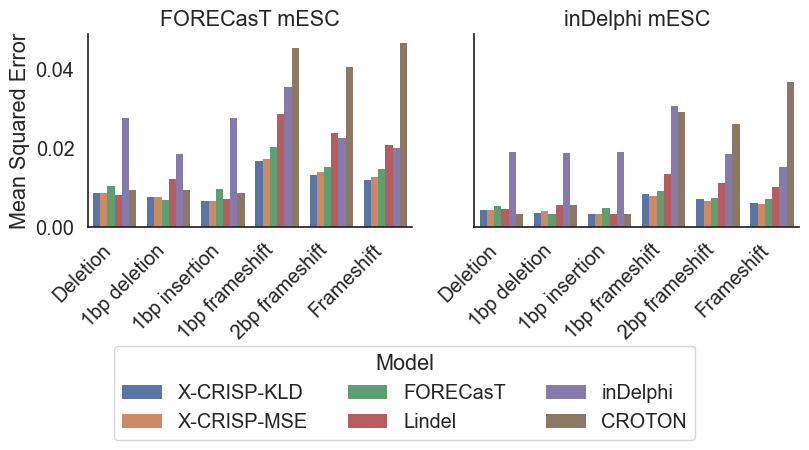

In [37]:
plt.show()